Constraint 1:  $k_x^2+k_y^2+k_z^2<k_F^2$

Constraint 2:  $f(k_x,k_y,k_z)=\alpha+\sqrt{\lambda_0^{-2}+k_x^2+k_z^2}\frac{\tan{k_y D}}{k_y}=0 $ (Suppose $\tanh(d/\lambda)$), where $\alpha=\frac{m_F}{m_S}$

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.lib.scimath import sqrt

# Parameters:

In [5]:
m_F=0.3*9.109390e-31
E_gap=0.5*1.6e-19
h_bar=6.626e-34/(2*np.pi)
l0=1/(np.sqrt(2*m_F*E_gap)/h_bar)*1e9

In [6]:
l0

0.5043201220145844

In [14]:
k_F=20
D=10
alpha=0.3 #m_S/m_F

Define the probability density function from $f(k_x,k_y,k_z)$, $P(k_x,k_y,k_z)=\delta(f(k_x,k_y,k_z))$ (not normalized)

The average now becomes $\frac{\int_{k_x^2+k_y^2+k_z^2\le k_F^2}\frac{P(k_x,k_y,k_z)}{\sqrt{\lambda_0^{-2}+k_x^2+k_y^2}}dk_xdk_ydk_z}{\int_{k_x^2+k_y^2+k_z^2\le k_F^2}P(k_x,k_y,k_z)dk_xdk_ydk_z}$

At $k_z=0$, the zero solutions are $k_x=\sqrt{(\frac{k_y}{\tan(k_y D)}\alpha)^2-\lambda_0^{-2}}$ . (Because $f(k_x,k_y,k_z)$ is an even function, we can restrict the integral region to only the positive sector.
)

The solutions will be:

Text(0, 0.5, '$k_x(\\mu \\rm{m}^{-1})$')

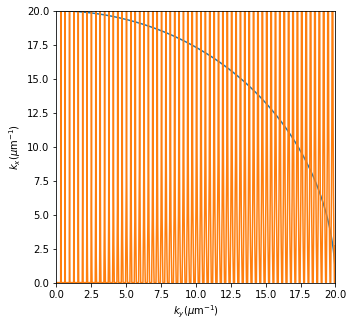

In [66]:
kylist=np.linspace(0.0001,k_F,10000)
constraint1=np.sqrt(k_F**2-klist**2)
constraint2=sqrt((kylist/np.tan(kylist*D)*alpha)**2-l0**-2)

fig,ax=plt.subplots(figsize=(20/4,20/4))
ax.plot(kylist,constraint1)
ax.plot(kylist,np.real(constraint2))
ax.set_ylim([0,20])
ax.set_xlim([0,20])
ax.set_xlabel(r'$k_y(\mu \rm{m}^{-1})$')
ax.set_ylabel(r'$k_x(\mu \rm{m}^{-1})$')

# Numerical integral

## $k_z=0$

In [136]:
kylist=np.linspace(0.0001,k_F,10000)
kx_con1=sqrt(k_F**2-kylist**2)
kx_con2=sqrt((kylist/np.tan(kylist*D)*0.3)**2-l0**(-2))
mask=(kx_con1>=kx_con2)*np.logical_not(np.iscomplex(kx_con2))
l_prime=1/sqrt(l0**-2+kx_con2**2)@mask/np.sum(mask)

In [137]:
l_prime

(0.24492555721700546+0j)

## $$

For $k_z\neq 0$, we can treat $k_x^2+k_z^2$ as $k_\parallel^2$, thus, the infinitesimal area of $dk_xdk_z=2\pi k_\parallel dk_\parallel$, the integral becomes $\frac{\int_{k_\parallel^2+k_y^2\le k_F^2}\frac{P(k_\parallel,k_z)}{\sqrt{\lambda_0^{-2}+k_\parallel^2}}dk_y 2\pi k_\parallel dk_\parallel}{\int_{k_\parallel^2+k_z^2\le k_F^2}P(k_\parallel,k_z)dk_y2\pi k_\parallel dk_\parallel} $, which looks exactly the same as $k_z=0$.Thus the numerical integral is

In [138]:
l_primeprime=kx_con2/sqrt(l0**-2+kx_con2**2)@mask/(mask@kx_con2)

In [139]:
l_primeprime

(0.1656203756832141+0j)